In [11]:
from sklearn.metrics import mutual_info_score
from collections import deque
from adjustText import adjust_text

import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib
import seaborn as sns
import numpy as np
import scipy.stats as stats
import mysql.connector

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 사용을 위해서 세팅
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc

font_path = "/usr/share/fonts/NanumFont/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings("ignore")

import configparser

from plt_custom_def import make_gen_dict, make_pie, show_label

In [2]:
# DB 접속

config = configparser.ConfigParser()
config.read('../config.ini')
dev = config['dev']

remote = mysql.connector.connect(
    host = dev['host'],
    port = dev['port'],
    user = dev['user'],
    password = dev['password'],
    database = dev['database']
)

mycursor = remote.cursor(buffered=True)

### 1. 종이 배출 비율이 높은 지역의 가구구성을 파이차트로 그려보자
- 대상 지역: 제주, 세종

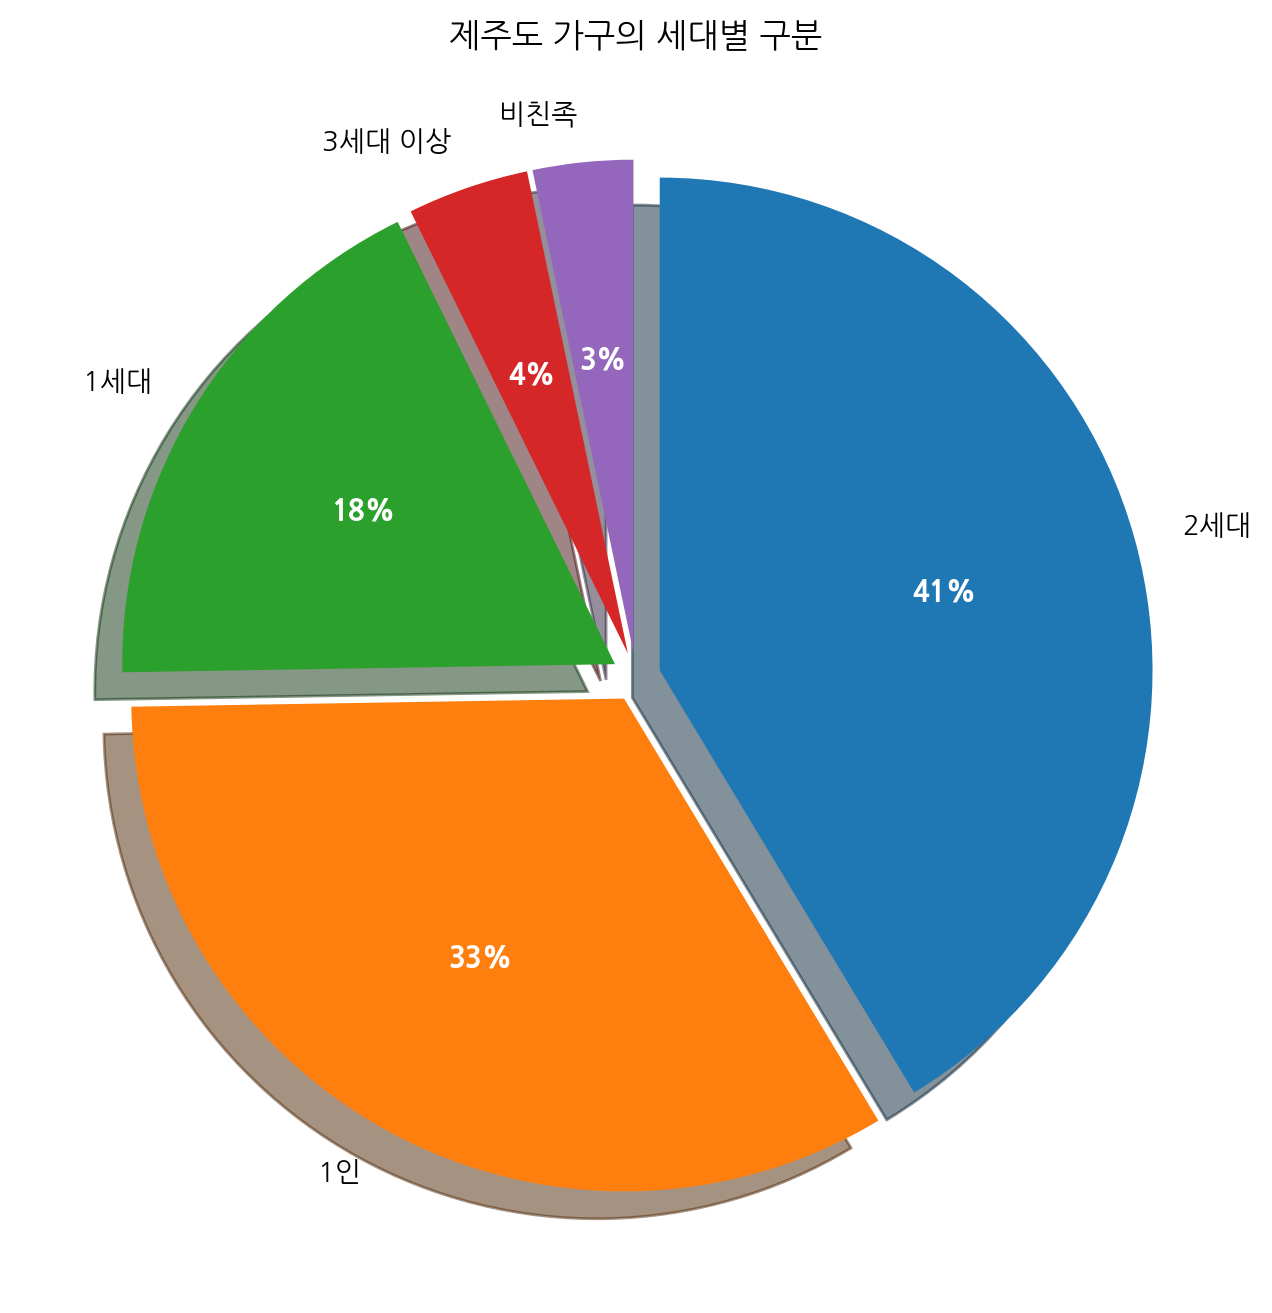

In [3]:
sql = "select * from home_generation where region_name like '%제주%'"
mycursor.execute(sql)
result = mycursor.fetchone()

gen_dict = make_gen_dict(result)
make_pie(gen_dict, '제주도 가구의 세대별 구분')

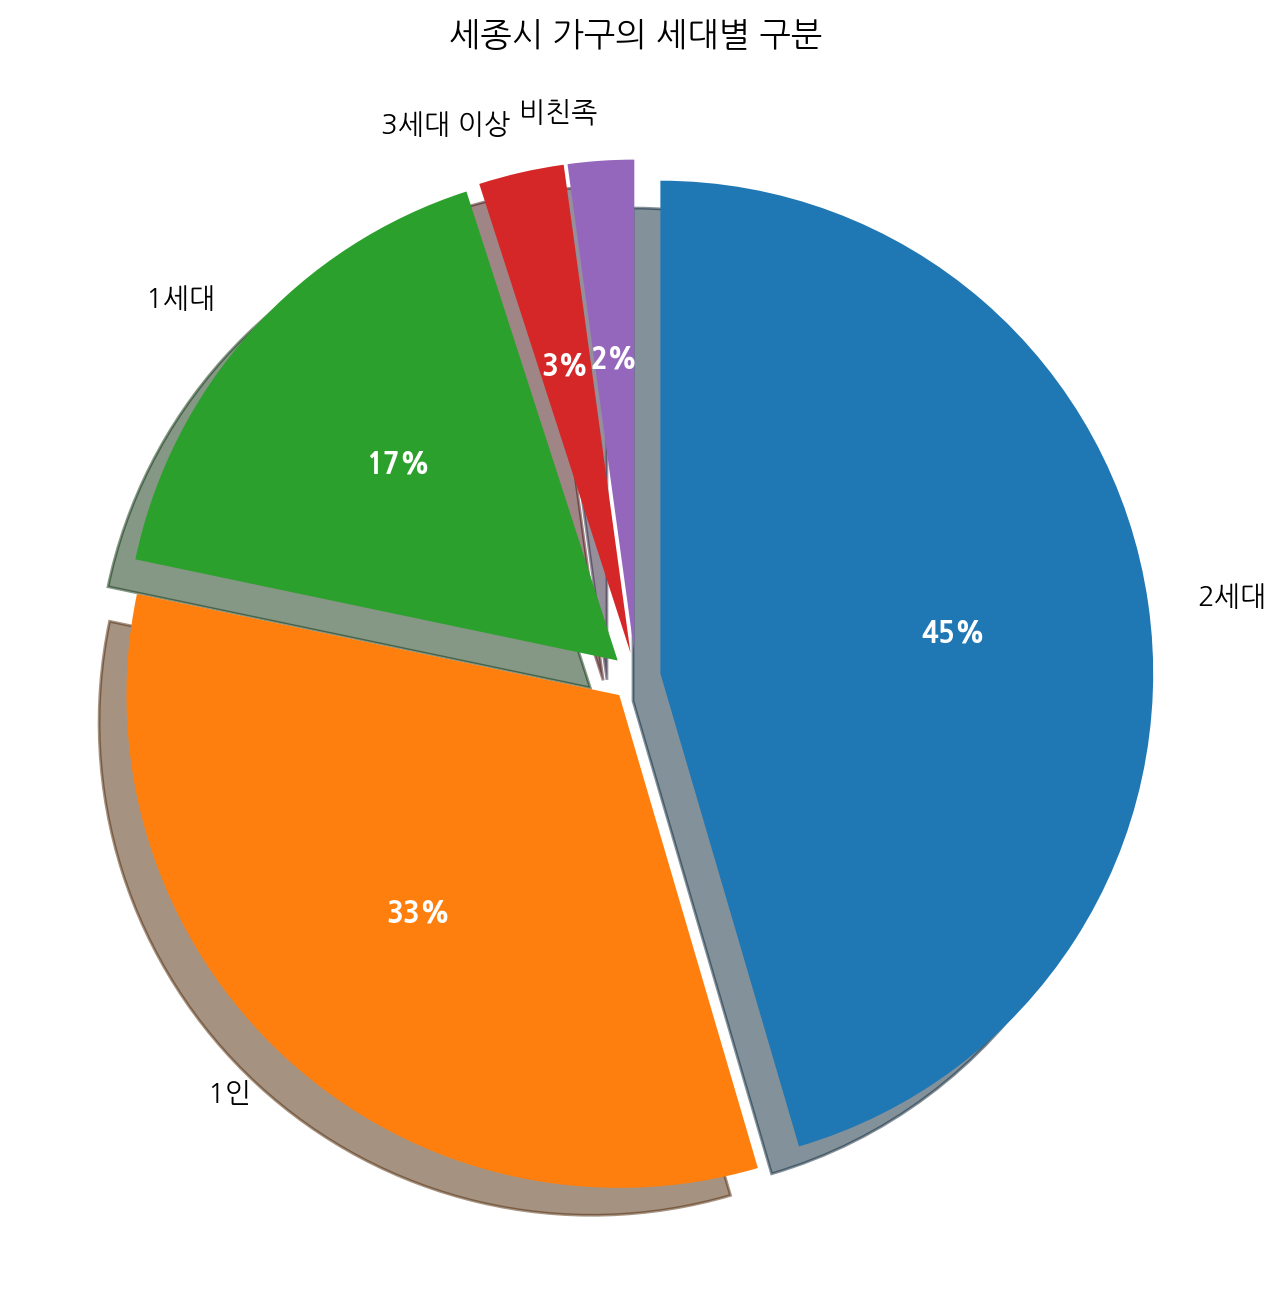

In [4]:
sql = "select * from home_generation where region_name like '%세종%'"
mycursor.execute(sql)
result = mycursor.fetchone()

gen_dict = make_gen_dict(result)
make_pie(gen_dict, '세종시 가구의 세대별 구분')

- 2세대 가구 비율이 높다

### 2. 종이 배출 비율이 낮은 지역의 가구구성을 파이차트로 그려보자
- 대상 지역: 경북, 대구

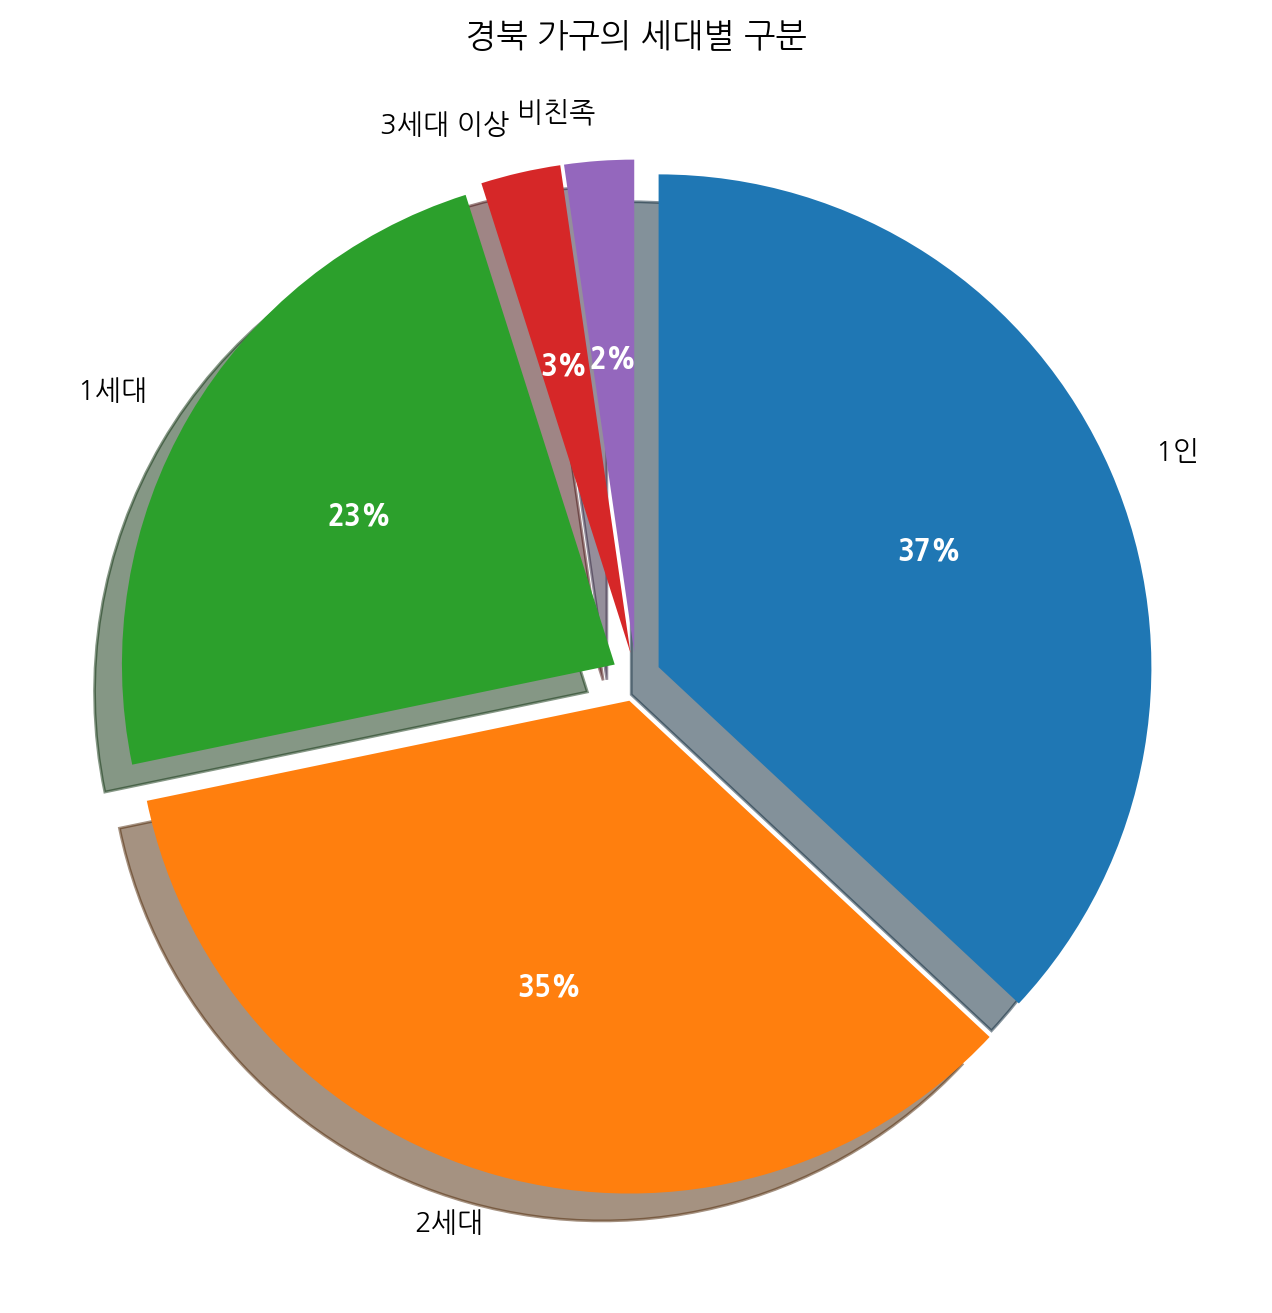

In [5]:
sql = "select * from home_generation where region_name like '%경상북도%'"
mycursor.execute(sql)
result = mycursor.fetchone()

gen_dict = make_gen_dict(result)
make_pie(gen_dict, '경북 가구의 세대별 구분')

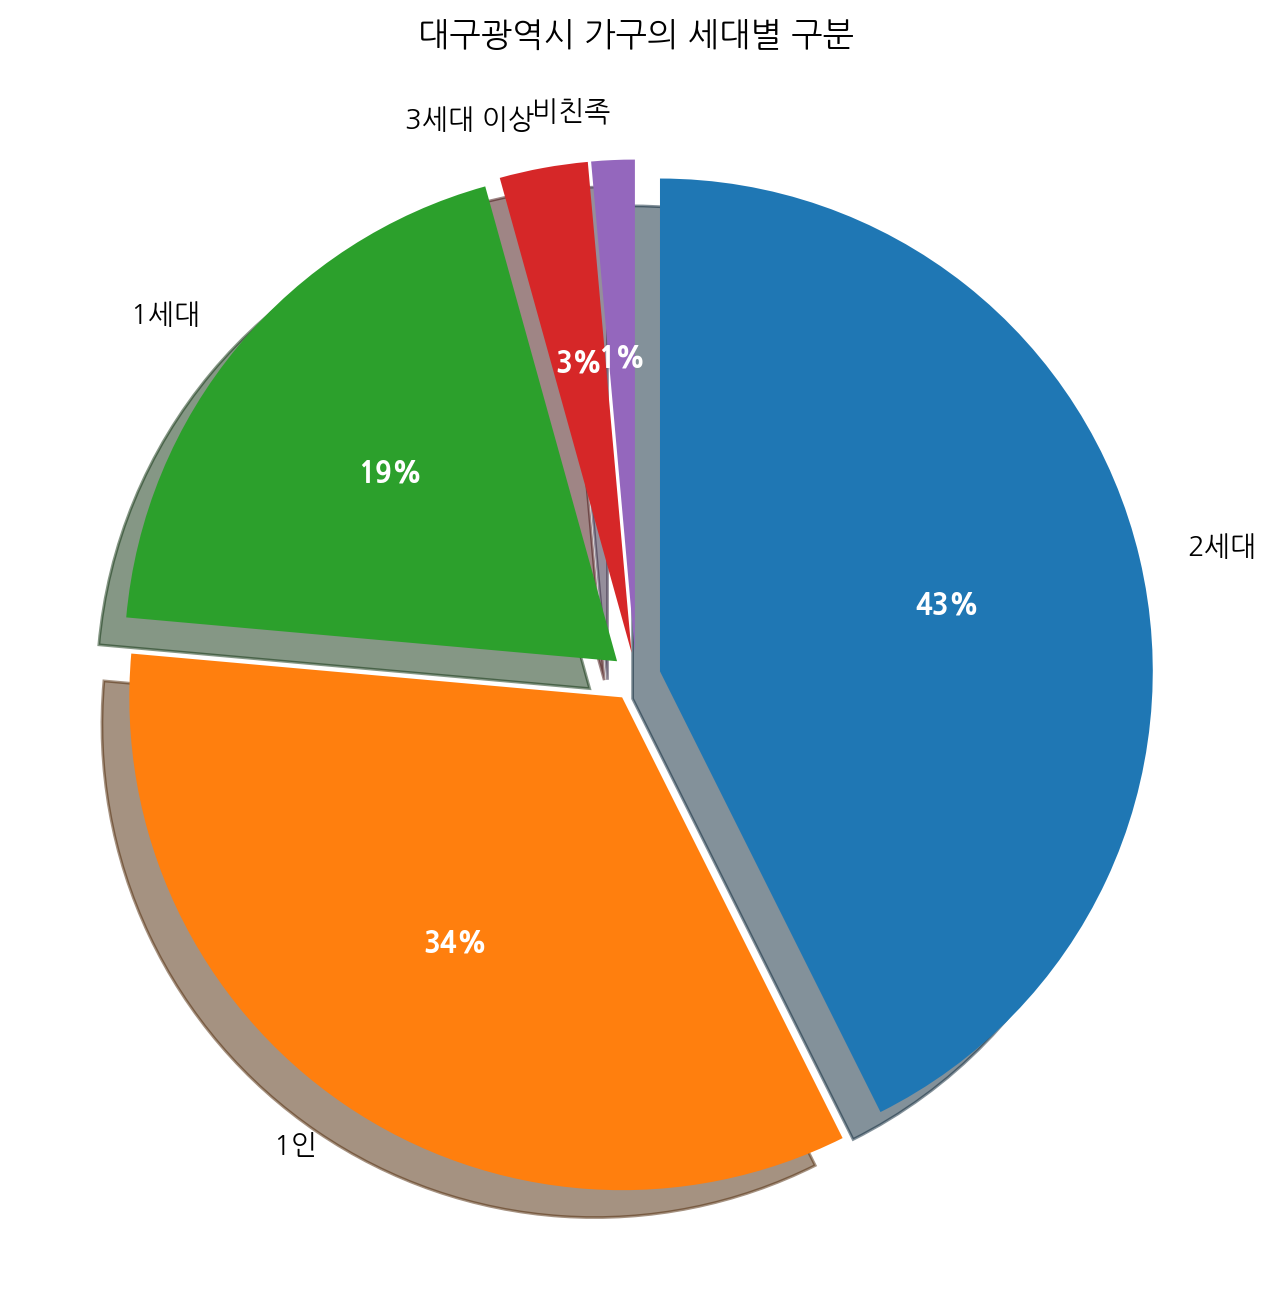

In [6]:
sql = "select * from home_generation where region_name like '%대구%'"
mycursor.execute(sql)
result = mycursor.fetchone()

gen_dict = make_gen_dict(result)
make_pie(gen_dict, '대구광역시 가구의 세대별 구분')

- 경북은 1인 세대 가구 비율이 높다. 대구는 2세대 가구 비율이 높다.
- 세대 구성은 상관있는 변수는 아닌 것 같다.

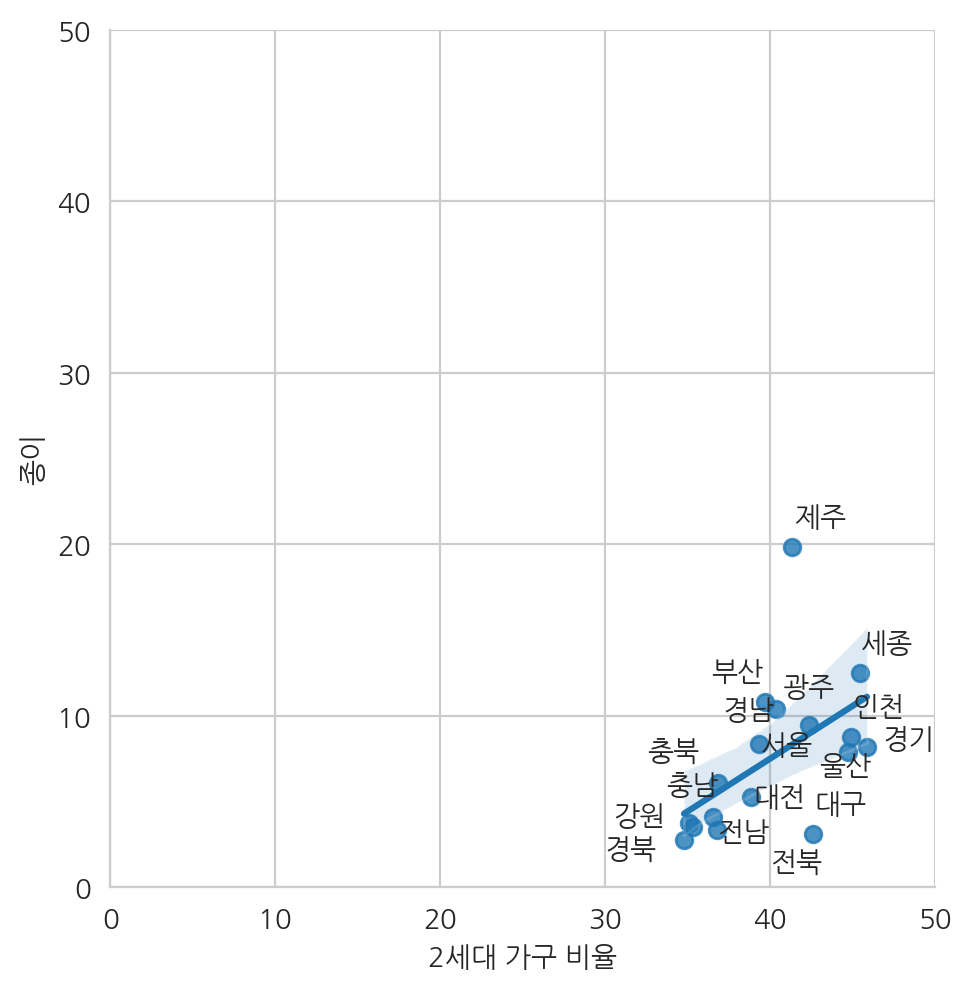

In [12]:
sql = open('16.select_two_gen_and_paper_rate.sql').read()
mycursor.execute(sql)
result = mycursor.fetchall()

region_list = []
two_gen_list = []
paper_rate_list = []

for v in result:
    region_list.append(v[0])
    two_gen_list.append(float(v[1]))
    paper_rate_list.append(float(v[2]))

sns_df = pd.DataFrame(data=zip(two_gen_list, paper_rate_list, region_list),
                      columns=['2세대 가구 비율', '종이', '지역'])

# sns.set_style('whitegrid')
sns.lmplot(data=sns_df, x='2세대 가구 비율', y='종이')

plt.xlim(0, 50)
plt.ylim(0, 50)

texts = show_label(region_list, two_gen_list, paper_rate_list, 0, 5, 'center')
adjust_text(texts)

plt.show();

In [8]:
# 공분산 구하기
np.cov(np.array(two_gen_list, dtype=float), 
       np.array(paper_rate_list, dtype=float))[0,1]

8.916382250514406

In [9]:
# 상관계수, p-value
stats.pearsonr(np.array(two_gen_list, dtype=float), 
               np.array(paper_rate_list, dtype=float))

PearsonRResult(statistic=0.5308300246126071, pvalue=0.028350900911390246)

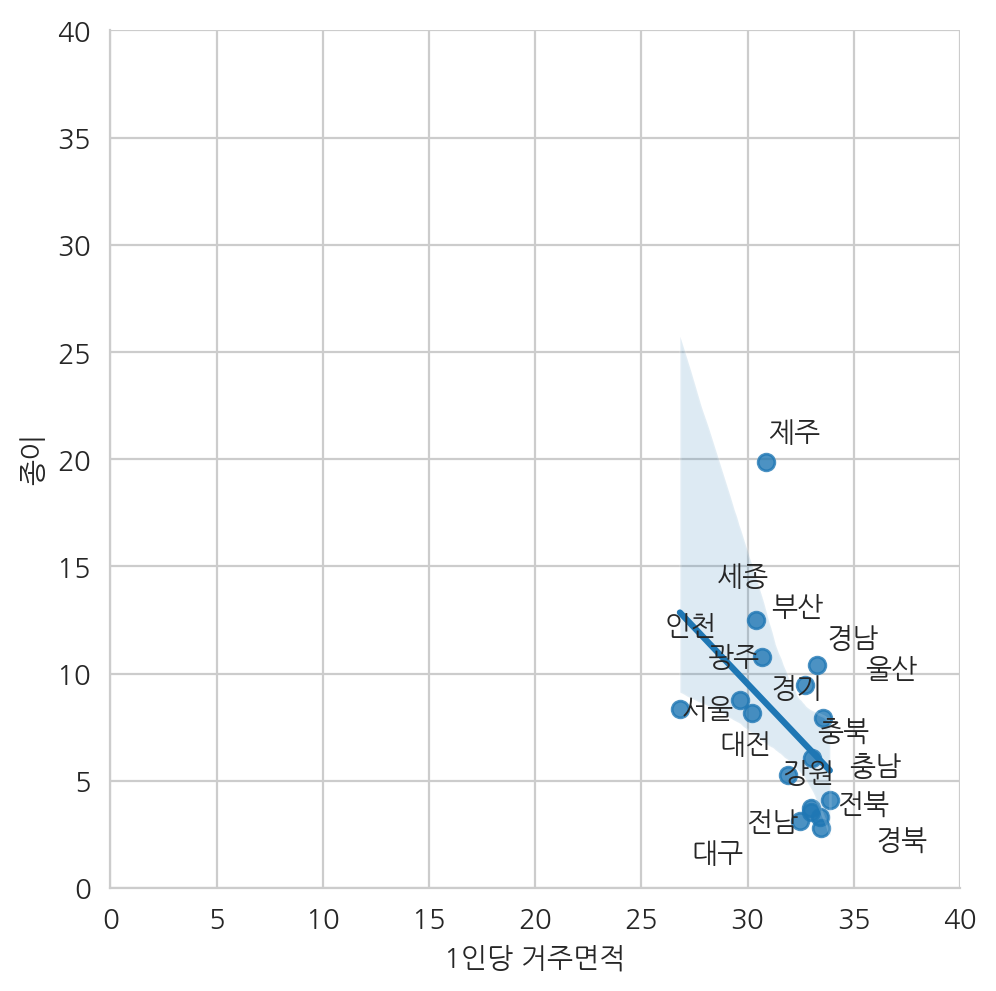

In [13]:
sql = open('17.select_space_and_paper_rate.sql').read()
mycursor.execute(sql)
result = mycursor.fetchall()

region_list = []
space_list = []
paper_rate_list = []

for v in result:
    region_list.append(v[0])
    space_list.append(float(v[1]))
    paper_rate_list.append(float(v[2]))

sns_df = pd.DataFrame(data=zip(space_list, paper_rate_list, region_list),
                      columns=['1인당 거주면적', '종이', '지역'])

# sns.set_style('whitegrid')
sns.lmplot(data=sns_df, x='1인당 거주면적', y='종이')

plt.xlim(0, 40)
plt.ylim(0, 40)

texts = show_label(region_list, space_list, paper_rate_list, 0, 5, 'center')
adjust_text(texts)

plt.show();

In [14]:
# 공분산 구하기
np.cov(np.array(space_list, dtype=float), 
       np.array(paper_rate_list, dtype=float))[0,1]

-3.69542164022697

In [15]:
# 상관계수, p-value
stats.pearsonr(np.array(space_list, dtype=float), 
               np.array(paper_rate_list, dtype=float))

PearsonRResult(statistic=-0.4455525768751299, pvalue=0.07307037643544476)